# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [57]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

As a first review, a notable aspect of the dataset is the inclusion of sequential repayment status (PAY_0 to PAY_6), offering a temporal dimension to the clients' financial behavior. This can be particularly insightful for identifying patterns or trends in repayment habits over time. Additionally, the mix of categorical (like education and marriage) and continuous variables (like age and bill amounts) could provide a comprehensive view of the factors influencing credit risk. However, it looks like there is a  class imbalance (most clients do not default) so we need to be careful especially when we evaluate the models using metrics.

Also, regarding some undescribed values in the payment status, based on the info I found on the discussion page of kaggle:
- -2 (No consumption): This status indicates that there were no new charges on the account for that month.
- 0 (The use of revolving credit): This status suggests that the minimum payment was made, but the full balance wasn't paid off (i.e., the client is utilizing revolving credit).



In [58]:
clients_df = pd.read_csv("data/UCI_Credit_Card.csv")
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [59]:
train_df, test_df = train_test_split(clients_df, test_size=0.3, random_state=76)
print(train_df.head(3))
print(test_df.head(3))

          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
8958    8959   340000.0    1          1         2   44      0      0      0   
22752  22753   200000.0    2          2         2   34      0      0      0   
25882  25883    80000.0    2          2         1   26      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
8958       0  ...    59324.0   156094.0   110234.0   20000.0    5000.0   
22752     -1  ...     1078.0     1598.0   171700.0    5504.0    1526.0   
25882      0  ...    75443.0    57735.0    58139.0    2800.0    2800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
8958     2000.0  112000.0    4234.0    4000.0                           1  
22752    1078.0    1598.0  173026.0    6000.0                           0  
25882    2400.0    2100.0    2100.0    2100.0                           0  

[3 rows x 25 columns]
          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [60]:
# 1. Descriptive statistics for numerical variables
numerical_columns = ['AGE', 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                     'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
print(train_df[numerical_columns].describe())

                AGE      LIMIT_BAL      BILL_AMT1      BILL_AMT2  \
count  21000.000000   21000.000000   21000.000000   21000.000000   
mean      35.412952  167563.508571   51100.594571   48965.462714   
std        9.136302  129919.112502   73651.958111   71005.547417   
min       21.000000   10000.000000 -165580.000000  -69777.000000   
25%       28.000000   50000.000000    3526.750000    2946.000000   
50%       34.000000  140000.000000   22004.500000   20756.000000   
75%       41.000000  240000.000000   67124.750000   63781.250000   
max       79.000000  800000.000000  746814.000000  743970.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  2.100000e+04   21000.000000   21000.000000   21000.000000   
mean   4.684151e+04   43039.813952   40121.889810   38623.497095   
std    6.939829e+04   63817.414980   60400.798292   59055.005208   
min   -1.572640e+05 -170000.000000  -81334.000000 -209051.000000   
25%    2.632750e+03    2300.000000    1800.0000

- The clients range from 21 to 79 years old, with an average age of around 35 years. The age distribution is fairly even.
- The bill amounts and the payment amounts vary widely, with a general trend of payments being more than the bill amounts.

In [61]:
# 2. Frequency distributions for categorical variables
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 
                       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in categorical_columns:
    print(f"\n Frequency distribution for {col}:")
    print(train_df[col].value_counts())


 Frequency distribution for SEX:
SEX
2    12692
1     8308
Name: count, dtype: int64

 Frequency distribution for EDUCATION:
EDUCATION
2    9789
1    7522
3    3365
5     197
4      80
6      37
0      10
Name: count, dtype: int64

 Frequency distribution for MARRIAGE:
MARRIAGE
2    11225
1     9508
3      230
0       37
Name: count, dtype: int64

 Frequency distribution for PAY_0:
PAY_0
 0    10288
-1     4001
 1     2616
-2     1898
 2     1868
 3      225
 4       59
 5       19
 8       10
 6        9
 7        7
Name: count, dtype: int64

 Frequency distribution for PAY_2:
PAY_2
 0    10975
-1     4266
 2     2769
-2     2634
 3      221
 4       73
 1       22
 5       20
 7       10
 6        9
 8        1
Name: count, dtype: int64

 Frequency distribution for PAY_3:
PAY_3
 0    10984
-1     4193
-2     2864
 2     2692
 3      161
 4       57
 7       17
 5       16
 6       11
 8        3
 1        2
Name: count, dtype: int64

 Frequency distribution for PAY_4:
PAY_4
 0    11

- There are more females than males.
- Most clients have a university or graduate school education. 
Fewer clients have high school educatin, and a small number have other types of educatin or  are unknow.
- Singles (11,225) are the most common, followed by married individuals (9,508). A small number are categorized as 'other' (230) or unspecified (37).
- A significant number of clients use revolving credit (status 0) or pay in full (status -1) across all months. There are instances of no consumption (status -2) which is also notable.
- There is no one who delays nine months and above to pay..

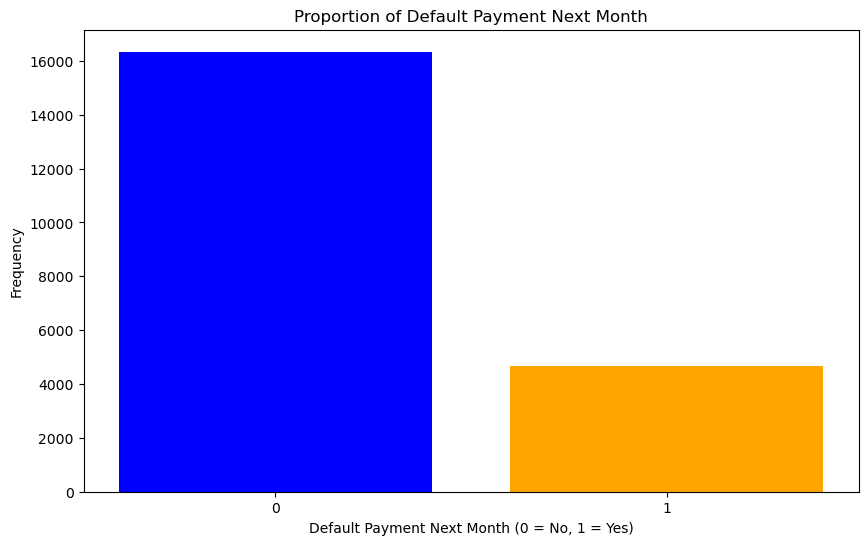

In [62]:
# Visualization 1: Bar plot for 'default.payment.next.month'
# Calculating frequencies
default_counts = train_df['default.payment.next.month'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(default_counts.index, default_counts.values, color=['blue', 'orange'])
plt.title('Proportion of Default Payment Next Month')
plt.xlabel('Default Payment Next Month (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set x-ticks to represent the two categories
plt.show()

- Based on this chart, we can clearly see the class imbalance and more specifically, about 22% of clients in this dataset defaulted the next month.

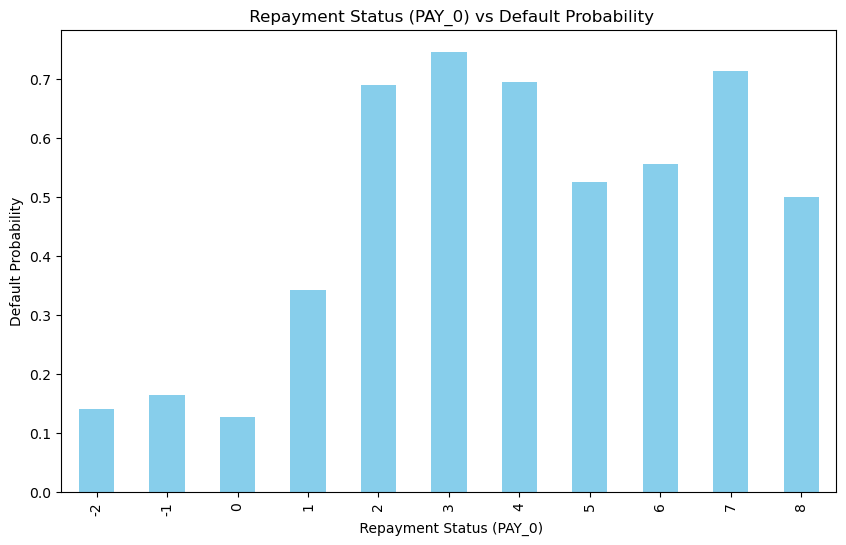

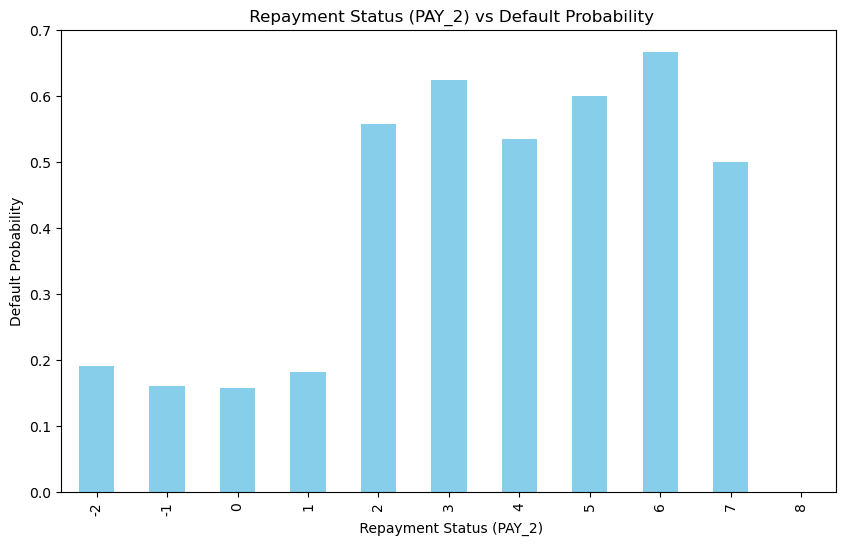

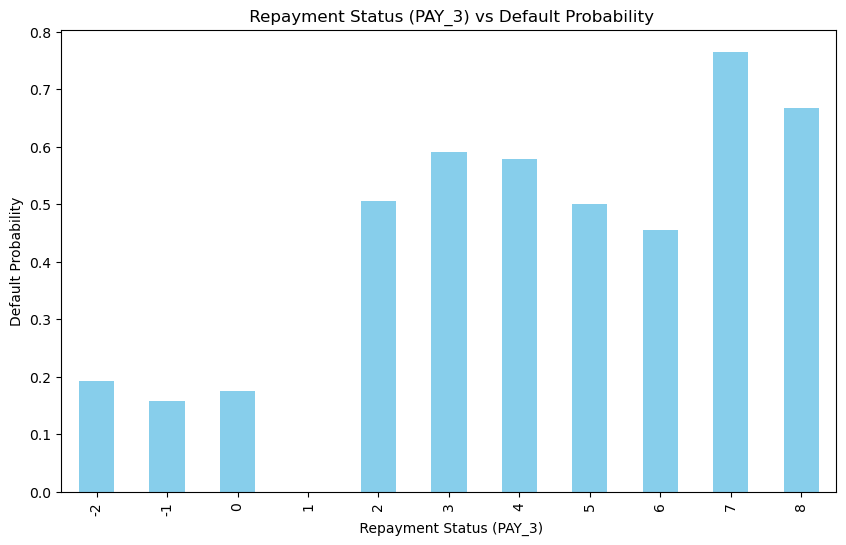

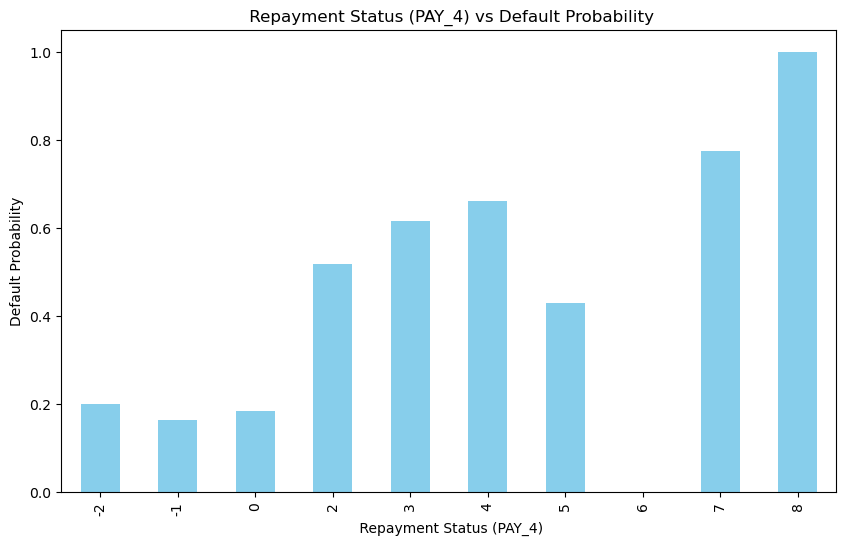

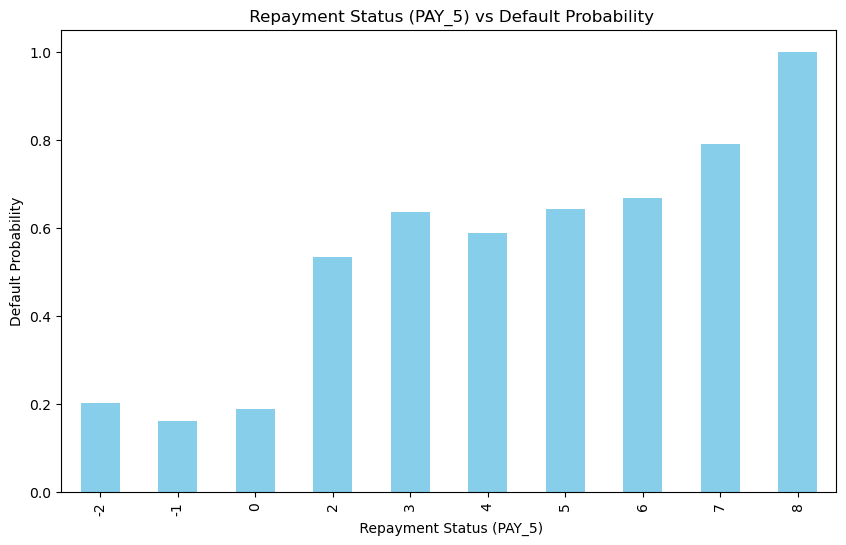

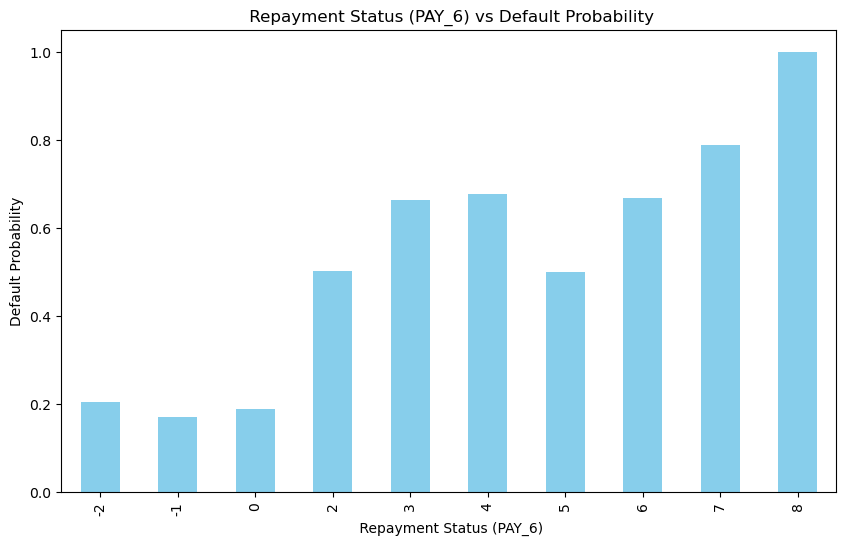

In [63]:
# Function to calculate default probability for a given repayment status variable
def calculate_default_probability(df, pay_status_col):
    # Group by repayment status and calculate mean default probability
    default_prob = df.groupby(pay_status_col)['default.payment.next.month'].mean()
    return default_prob

pay_status_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_status_columns:
    default_prob = calculate_default_probability(train_df, col)
    # Create a bar chart
    plt.figure(figsize=(10, 6))
    default_prob.plot(kind='bar', color='skyblue')
    plt.title(f' Repayment Status ({col}) vs Default Probability')
    plt.xlabel(f' Repayment Status ({col})')
    plt.ylabel('Default Probability')
    plt.show()

- Across all months, there is a noticeable trend where a delay in payment (represented by higher values in the repayment status) is associated with a higher probability of defaulting the next month.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [64]:
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                    'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 
                    'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
ordinal_features = ['EDUCATION', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
# since ordinal features are already expressed as numeric
combined_features = numeric_features + ordinal_features 
categorical_features = ['SEX', 'MARRIAGE']
target = 'default.payment.next.month'
drop_features = ['ID'] 

In [65]:
missing_vals_cols = []
for column_name in train_df.columns:
    if train_df[column_name].isna().any():
        missing_vals_cols.append(column_name)

In [66]:
print(missing_vals_cols)

[]


In [67]:
# Dropping the 'ID' feature from the datasets
train_df = train_df.drop(columns=drop_features)
test_df = test_df.drop(columns=drop_features)

# Replace 0 and 6 of EDUCATION with 5 in both train and test datasets since I don't see the difference.
train_df['EDUCATION'] = train_df['EDUCATION'].replace([0, 6], 5)
test_df['EDUCATION'] = test_df['EDUCATION'].replace([0, 6], 5)

# Replace 0 of MARRIAGE with 3 in both train and test datasets since I don't see the difference.
train_df['MARRIAGE'] = train_df['MARRIAGE'].replace(0, 3)
test_df['MARRIAGE'] = test_df['MARRIAGE'].replace(0, 3)


# Separating the independent variables (X) and the target variable (y)
X_train = train_df.drop(columns=target)
y_train = train_df[target]

X_test = test_df.drop(columns=target)
y_test = test_df[target]


In [68]:
preprocessor = make_column_transformer(
    (StandardScaler(), combined_features),
    (OneHotEncoder(drop='if_binary', sparse_output=False), categorical_features),
)

In [72]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [73]:
dummy = DummyClassifier(random_state = 42)
pipe = make_pipeline(preprocessor, dummy)
results_dict = {} 
results_dict["dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)

# Print the resulre'])
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.028 (+/- 0.003),0.007 (+/- 0.005),0.778 (+/- 0.000),0.778 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)